# Construcción de la base de datos

### 1) *Importar los datos*

In [1]:
import wbdata

In [2]:
wb_regions = ['Arab World', 'Caribbean small states',
              'Central Europe and the Baltics', 'Early-demographic dividend',
              'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
              'East Asia & Pacific (IDA & IBRD countries)',
              'Euro area', 'Europe & Central Asia',
              'Europe & Central Asia (excluding high income)',
              'Europe & Central Asia (IDA & IBRD countries)',
              'European Union',
              'Fragile and conflict affected situations',
              'Heavily indebted poor countries (HIPC)',
              'High income',
              'IBRD only',
              'IDA & IBRD total',
              'IDA blend',
              'IDA only',
              'IDA total',
              'Late-demographic dividend',
              'Latin America & Caribbean',
              'Latin America & Caribbean (excluding high income)',
              'Latin America & the Caribbean (IDA & IBRD countries)',
              'Least developed countries',
              'Least developed countries: UN classification',
              'Low & middle income',
              'Low income',
              'Lower middle income',
              'Middle East & North Africa',
              'Middle East & North Africa (excluding high income)',
              'Middle East & North Africa (IDA & IBRD countries)',
              'Middle income',
              'North America',
              'Not classified',
              'OECD members',
              'Other small states',
              'Pacific island small states',
              'Post-demographic dividend',
              'Pre-demographic dividend',
              'Small states',
              'South Asia',
              'South Asia (IDA & IBRD)',
              'Sub-Saharan Africa',
              'Sub-Saharan Africa (excluding high income)',
              'Sub-Saharan Africa (IDA & IBRD countries)',
              'Upper middle income',
              'World']

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import statsmodels.api as sm

### 2) *Definir  y limpiar las Variables*

In [4]:
Governmentdebt_raw = wbdata.get_data("GC.DOD.TOTL.GD.ZS")

In [5]:
Inflation_raw = wbdata.get_data("FP.CPI.TOTL.ZG")

In [6]:
Expense_raw = wbdata.get_data("GC.XPN.TOTL.GD.ZS")

In [7]:
Tax_raw = wbdata.get_data("GC.TAX.TOTL.GD.ZS")

In [8]:
Reserves_raw = wbdata.get_data("FI.RES.TOTL.CD")

In [9]:
Officialexchange_raw = wbdata.get_data("PA.NUS.FCRF")

In [10]:
Interestrate_raw = wbdata.get_data("FR.INR.RINR")

In [11]:
Unemployment_raw = wbdata.get_data("SL.UEM.TOTL.ZS")

In [12]:
def wb_clean_year_data(wb_raw, year):
    rv = {}
    for X in wb_raw:
        date = X['date']
        country = X['country']['value']
        if date == year and country not in wb_regions:
            try:
                value = float(X['value'])
                rv[country] = value
            except:
                pass
    return rv

In [13]:
def wb_dict_to_dataframe(dict_clean, nombre_variable, año):
    df = pd.DataFrame({'pais': list(dict_clean.keys()),
                       nombre_variable: list(dict_clean.values()),
                       'año': [año] * len(dict_clean)})
    return df

### 3) *Obtenemos las variables limpias*

In [14]:
variables=['GC.DOD.TOTL.GD.ZS','FP.CPI.TOTL.ZG','GC.XPN.TOTL.GD.ZS','GC.TAX.TOTL.GD.ZS','FI.RES.TOTL.CD','PA.NUS.FCRF','FR.INR.RINR','SL.UEM.TOTL.ZS']

In [15]:
Governmentdebt_raw = wbdata.get_data("GC.DOD.TOTL.GD.ZS")
Inflation_raw = wbdata.get_data("FP.CPI.TOTL.ZG")
Expense_raw = wbdata.get_data("GC.XPN.TOTL.GD.ZS")
Tax_raw = wbdata.get_data("GC.TAX.TOTL.GD.ZS")
Reserves_raw = wbdata.get_data("FI.RES.TOTL.CD")
Officialexchange_raw = wbdata.get_data("PA.NUS.FCRF")
Interestrate_raw = wbdata.get_data("FR.INR.RINR")
Unemployment_raw = wbdata.get_data("SL.UEM.TOTL.ZS")

In [16]:
raw_lists = {'Deuda': Governmentdebt_raw,
             'Inflacion': Inflation_raw,
             'Gasto público': Expense_raw,
             'Tasa fiscal': Tax_raw,
             'Reservas':Reserves_raw,
             'Tipo de cambio':Officialexchange_raw,
             'Tasa de interes':Interestrate_raw,}
            

In [17]:
for año in range(1989, 2011):
    dfs_año = []
    for k, v in raw_lists.items():
        v_clean = wb_clean_year_data(v, str(año))
        df = wb_dict_to_dataframe(v_clean, k, str(año))
        dfs_año.append(df)
    if año == 1989:
        for i, df in enumerate(dfs_año):
            if i == 0:
                df_año = df.merge(dfs_año[i + 1], on=['pais', 'año'])
            else:
                try:
                    df_año = df_año.merge(dfs_año[i + 1], on=['pais', 'año'])
                except:
                    pass
    else:
        for i, df in enumerate(dfs_año):
            if i == 0:
                df_otros_años = df.merge(dfs_año[i + 1], on=['pais', 'año'])
            else:
                try:
                    df_otros_años = df_otros_años.merge(dfs_año[i + 1], on=['pais', 'año'])
                except:
                    pass
        df_año = df_año.append(df_otros_años, ignore_index=True,)

In [18]:
df_año['año'].unique()

array(['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010'], dtype=object)

In [19]:
df_año ['pais'].value_counts()

United States          22
Singapore              21
Jamaica                21
United Kingdom         21
Australia              21
                       ..
Czech Republic          2
Trinidad and Tobago     2
Italy                   2
Zambia                  1
Egypt, Arab Rep.        1
Name: pais, Length: 63, dtype: int64

### 4) *Balanceamos la base de datos*

In [20]:
paises_buenos = []
for country, counts in dict(df_año['pais'].value_counts()).items():
    if counts >= 21:
        paises_buenos.append(country)

In [21]:
df_año_paises_buenos = df_año.loc[df_año['pais'].isin(paises_buenos)]

In [22]:
df_año_paises_buenos = df_año_paises_buenos.loc[df_año_paises_buenos['año']!="1989"]

In [23]:
df_año_paises_buenos ['pais'].value_counts()

Singapore         21
India             21
Australia         21
Iceland           21
United States     21
Mauritius         21
Bhutan            21
Jamaica           21
United Kingdom    21
Name: pais, dtype: int64

In [24]:
df_año_paises_buenos.head(100)

,pais,Deuda,año,Inflacion,Gasto público,Tasa fiscal,Reservas,Tipo de cambio,Tasa de interes
1,Australia,12.253160,1990,7.333022,21.861559,22.476879,1.931874e+10,1.281057,9.669791
4,Bhutan,51.188019,1990,10.000000,20.557124,4.413943,8.883421e+07,17.505325,8.789378
7,Iceland,29.869468,1990,15.510722,29.377902,23.472225,4.549824e+08,58.283775,0.878499
8,India,50.783254,1990,8.971233,15.484217,9.993591,5.637446e+09,17.503500,5.269527
10,Jamaica,138.741328,1990,21.960175,22.642856,23.486431,1.681553e+08,7.184025,4.302951
...,...,...,...,...,...,...,...,...,...
284,Mauritius,32.117443,2000,4.199288,20.092293,16.953664,9.143661e+08,26.249558,16.788430
291,Singapore,83.842292,2000,1.361624,15.716732,14.855789,8.108498e+10,1.723963,1.897404
297,United Kingdom,42.607454,2000,1.182956,32.251054,26.072901,5.093939e+10,0.660931,4.028270
298,United States,33.263120,2000,3.376857,17.924094,12.969032,1.283995e+11,1.000000,6.844844


In [25]:
df_año_paises_buenos.to_excel('base_final.xlsx')

### 5) *Agregamos la variable dummy*

In [26]:
Base_final = pd.read_excel('/Users/joaco/Downloads/trabajo_econometria_up_5-master 4/base_final_1.xlsx')

In [27]:
Base_final.head(100)

,Pais,Año,Deuda,Inflacion,Gasto_público,Tasa_fiscal,Reservas,Tipo_de_cambio,Defaults_prev,Default_previo_c_t (3 años)
0,Australia,1990,12.253160,7.333022,21.861559,22.476879,1.931874e+10,1.281057,0,0
1,Bhutan,1990,51.188019,10.000000,20.557124,4.413943,8.883421e+07,17.505325,1,0
2,Guatemala,1990,24.480685,41.221867,9.131265,6.865212,3.618105e+08,4.485758,1,1
3,Iceland,1990,29.869468,15.510722,29.377902,23.472225,4.549824e+08,58.283775,0,0
4,India,1990,50.783254,8.971233,15.484217,9.993591,5.637446e+09,17.503500,0,0
...,...,...,...,...,...,...,...,...,...,...
95,Tunisia,1996,55.296518,3.725145,28.016448,19.837619,1.977688e+09,0.973408,1,1
96,United Kingdom,1996,43.628347,2.851782,33.857007,23.134875,4.670002e+10,0.640958,0,0
97,United States,1996,46.741769,2.931204,20.005396,11.373915,1.606602e+11,1.000000,0,0
98,Australia,1997,20.911558,0.224888,23.864424,22.430942,1.758826e+10,1.347380,0,0


# Estadísticas Descriptivas

In [53]:
Base_final.columns

Index(['Pais', 'Año', 'Deuda', 'Inflacion', 'Gasto_público', 'Tasa_fiscal',
       'Reservas', 'Tipo_de_cambio', 'Defaults_prev',
       'Default_previo_c_t (3 años)'],
      dtype='object')

In [29]:
import statistics as stats
from scipy import stats

In [30]:
Base_final.describe()

,Año,Deuda,Inflacion,Gasto_público,Tasa_fiscal,Reservas,Tipo_de_cambio,Defaults_prev,Default_previo_c_t (3 años)
count,294.000000,294.000000,294.000000,294.000000,294.000000,2.940000e+02,294.000000,294.000000,294.000000
mean,2000.000000,50.851689,5.644940,21.875636,16.127629,4.440132e+10,19.567441,0.302721,0.367347
std,6.065625,33.307938,7.337135,7.293717,6.051511,7.065982e+10,24.735308,0.460219,0.482904
min,1990.000000,0.018398,-18.108630,7.562050,4.413943,8.512000e+07,0.499772,0.000000,0.000000
25%,1995.000000,26.459870,2.205611,16.466839,10.261597,1.147301e+09,1.094097,0.000000,0.000000
50%,2000.000000,44.853644,3.890281,20.175852,16.078596,1.052933e+10,3.209600,0.000000,0.000000
75%,2005.000000,64.231988,6.830412,27.094002,21.830268,6.015286e+10,35.425997,1.000000,1.000000
max,2010.000000,232.832211,77.296593,42.283512,27.226929,4.889285e+11,123.638381,1.000000,1.000000


In [31]:
Base_final.corr()

,Año,Deuda,Inflacion,Gasto_público,Tasa_fiscal,Reservas,Tipo_de_cambio,Defaults_prev,Default_previo_c_t (3 años)
Año,1.000000,0.062282,-0.247866,0.139231,0.040947,0.294656,0.171639,-0.204178,-0.184100
Deuda,0.062282,1.000000,0.276047,0.285969,0.218365,0.015810,0.194630,0.328121,0.237844
Inflacion,-0.247866,0.276047,1.000000,-0.094313,0.047084,-0.206723,0.171911,0.407642,0.381467
Gasto_público,0.139231,0.285969,-0.094313,1.000000,0.751251,-0.151823,0.129256,0.010936,-0.087885
Tasa_fiscal,0.040947,0.218365,0.047084,0.751251,1.000000,-0.321235,0.117547,0.064208,-0.026640
Reservas,0.294656,0.015810,-0.206723,-0.151823,-0.321235,1.000000,-0.217183,-0.345040,-0.402300
Tipo_de_cambio,0.171639,0.194630,0.171911,0.129256,0.117547,-0.217183,1.000000,0.009708,0.021968
Defaults_prev,-0.204178,0.328121,0.407642,0.010936,0.064208,-0.345040,0.009708,1.000000,0.757195
Default_previo_c_t (3 años),-0.184100,0.237844,0.381467,-0.087885,-0.026640,-0.402300,0.021968,0.757195,1.000000


In [70]:
Base_final.cov()

,Año,Deuda,Inflacion,Gasto_público,Tasa_fiscal,Reservas,Tipo_de_cambio,Defaults_prev,Default_previo_c_t (3 años)
Año,3.679181e+01,1.258308e+01,-1.103110e+01,6.159698e+00,1.503026e+00,1.262882e+11,2.575195e+01,-5.699659e-01,-5.392491e-01
Deuda,1.258308e+01,1.109419e+03,6.746166e+01,6.947289e+01,4.401435e+01,3.720886e+10,1.603521e+02,5.029746e+00,3.825616e+00
Inflacion,-1.103110e+01,6.746166e+01,5.383355e+01,-5.047144e+00,2.090575e+00,-1.071736e+11,3.119956e+01,1.376479e+00,1.351590e+00
Gasto_público,6.159698e+00,6.947289e+01,-5.047144e+00,5.319830e+01,3.315870e+01,-7.824540e+10,2.331946e+01,3.670799e-02,-3.095463e-01
Tasa_fiscal,1.503026e+00,4.401435e+01,2.090575e+00,3.315870e+01,3.662078e+01,-1.373598e+11,1.759514e+01,1.788204e-01,-7.785115e-02
Reservas,1.262882e+11,3.720886e+10,-1.071736e+11,-7.824540e+10,-1.373598e+11,4.992810e+21,-3.795909e+11,-1.122033e+10,-1.372726e+10
Tipo_de_cambio,2.575195e+01,1.603521e+02,3.119956e+01,2.331946e+01,1.759514e+01,-3.795909e+11,6.118355e+02,1.105135e-01,2.624005e-01
Defaults_prev,-5.699659e-01,5.029746e+00,1.376479e+00,3.670799e-02,1.788204e-01,-1.122033e+10,1.105135e-01,2.118014e-01,1.682803e-01
Default_previo_c_t (3 años),-5.392491e-01,3.825616e+00,1.351590e+00,-3.095463e-01,-7.785115e-02,-1.372726e+10,2.624005e-01,1.682803e-01,2.331964e-01


In [38]:
Base_final.var()

Año                            3.679181e+01
Deuda                          1.109419e+03
Inflacion                      5.383355e+01
Gasto_público                  5.319830e+01
Tasa_fiscal                    3.662078e+01
Reservas                       4.992810e+21
Tipo_de_cambio                 6.118355e+02
Defaults_prev                  2.118014e-01
Default_previo_c_t (3 años)    2.331964e-01
dtype: float64

Text(0, 0.5, 'Inflación')

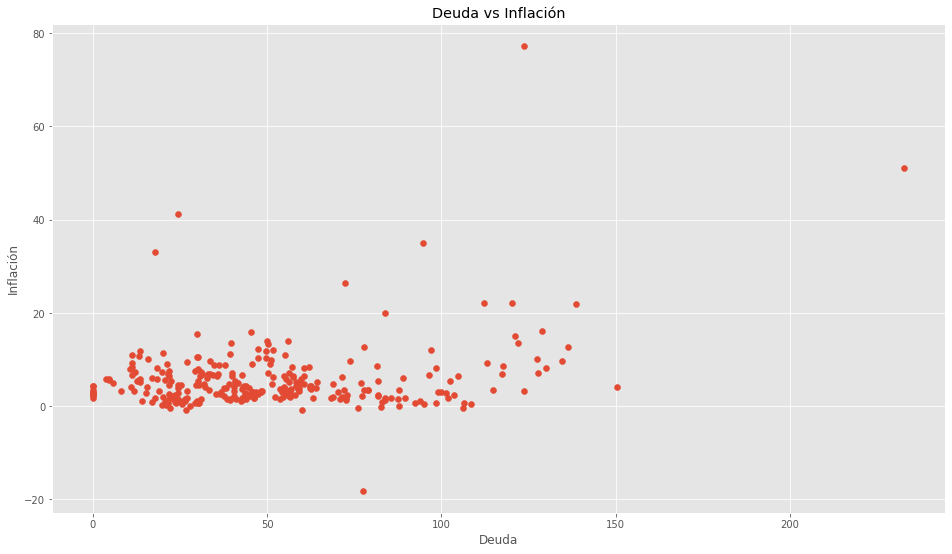

In [64]:
plt.figure(figsize=(16,9))
plt.scatter(Base_final.Deuda,Base_final.Inflacion)
plt.title("Deuda vs Inflación")
plt.xlabel("Deuda")
plt.ylabel("Inflación")

In [63]:
Base_final[["Inflacion","Deuda"]].corr()

,Inflacion,Deuda
Inflacion,1.000000,0.276047
Deuda,0.276047,1.000000


In [69]:
Base_final[["Inflacion","Deuda"]].cov()

,Inflacion,Deuda
Inflacion,53.833545,67.461659
Deuda,67.461659,1109.418740


Text(0, 0.5, 'Tipo de Cambio')

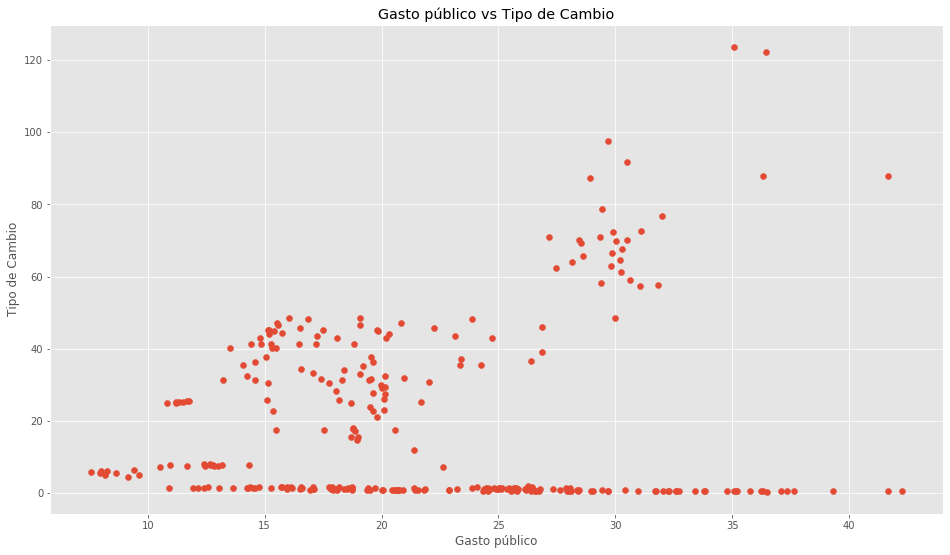

In [33]:
plt.figure(figsize=(16,9))
plt.scatter(Base_final.Gasto_público,Base_final.Tipo_de_cambio)
plt.title("Gasto público vs Tipo de Cambio")
plt.xlabel("Gasto público")
plt.ylabel("Tipo de Cambio")

In [62]:
Base_final[["Gasto_público","Tipo_de_cambio"]].corr()

,Gasto_público,Tipo_de_cambio
Gasto_público,1.000000,0.129256
Tipo_de_cambio,0.129256,1.000000


In [68]:
Base_final[["Gasto_público","Tipo_de_cambio"]].cov()

,Gasto_público,Tipo_de_cambio
Gasto_público,53.198301,23.319461
Tipo_de_cambio,23.319461,611.835483


Text(0, 0.5, 'Reservas')

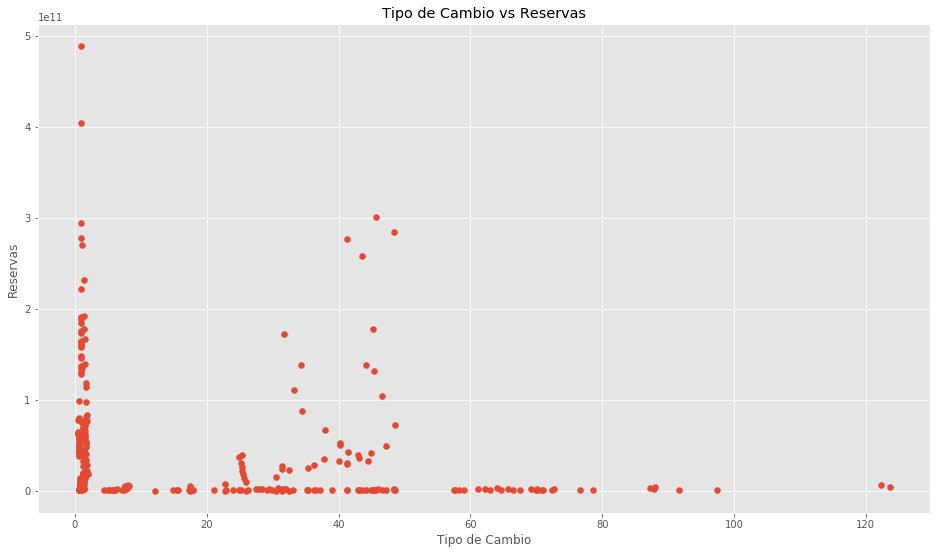

In [36]:
plt.figure(figsize=(16,9))
plt.scatter(Base_final.Tipo_de_cambio,Base_final.Reservas)
plt.title("Tipo de Cambio vs Reservas")
plt.xlabel("Tipo de Cambio")
plt.ylabel("Reservas")

In [61]:
Base_final[["Tipo_de_cambio","Reservas"]].corr()

,Tipo_de_cambio,Reservas
Tipo_de_cambio,1.000000,-0.217183
Reservas,-0.217183,1.000000


In [66]:
Base_final[["Tipo_de_cambio","Reservas"]].cov()

,Tipo_de_cambio,Reservas
Tipo_de_cambio,6.118355e+02,-3.795909e+11
Reservas,-3.795909e+11,4.992810e+21


Text(0, 0.5, 'Tasa Fiscal')

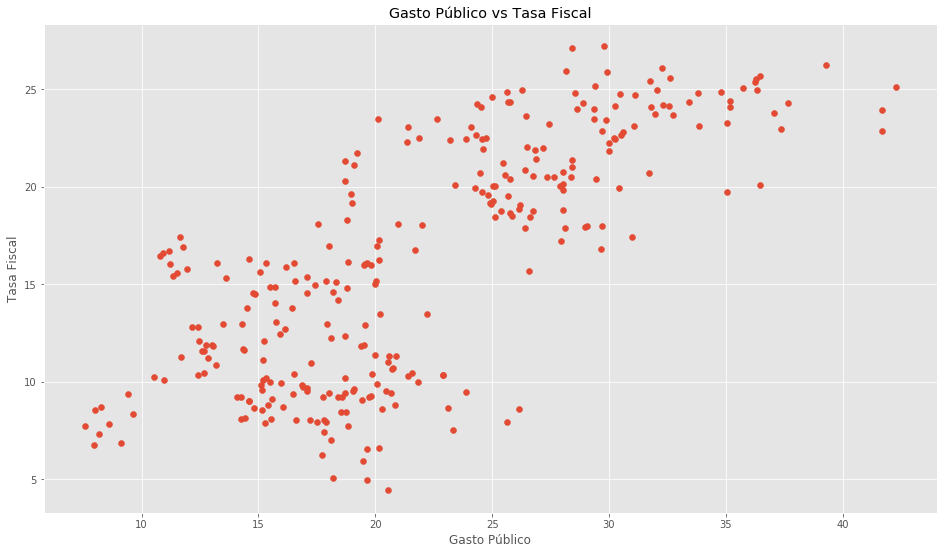

In [54]:
plt.figure(figsize=(16,9))
plt.scatter(Base_final.Gasto_público,Base_final.Tasa_fiscal)
plt.title("Gasto Público vs Tasa Fiscal")
plt.xlabel("Gasto Público")
plt.ylabel("Tasa Fiscal")

In [60]:
Base_final[["Gasto_público","Tasa_fiscal"]].corr()

,Gasto_público,Tasa_fiscal
Gasto_público,1.000000,0.751251
Tasa_fiscal,0.751251,1.000000


In [67]:
Base_final[["Gasto_público","Tasa_fiscal"]].cov()

,Gasto_público,Tasa_fiscal
Gasto_público,53.198301,33.158701
Tasa_fiscal,33.158701,36.620782


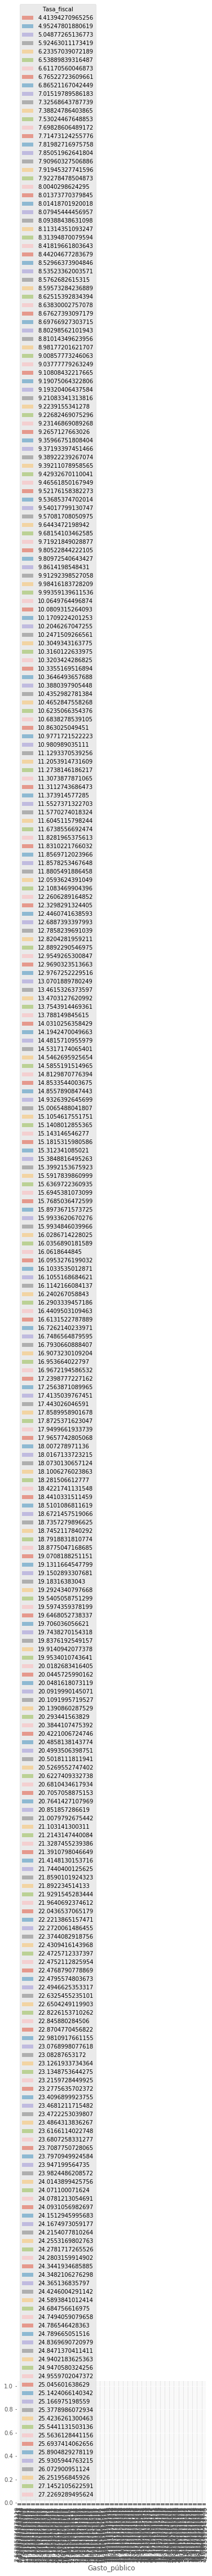

In [39]:
pd.crosstab(Base_final.Gasto_público,Base_final.Tasa_fiscal).plot(kind = 'bar', alpha =0.5)

### Deuda

In [35]:
Base_final['Deuda'].describe()

count    294.000000
mean      50.851689
std       33.307938
min        0.018398
25%       26.459870
50%       44.853644
75%       64.231988
max      232.832211
Name: Deuda, dtype: float64

### Inflación

In [36]:
Base_final['Inflacion'].describe()

count    294.000000
mean       5.644940
std        7.337135
min      -18.108630
25%        2.205611
50%        3.890281
75%        6.830412
max       77.296593
Name: Inflacion, dtype: float64

### Gasto Público

In [40]:
Base_final['Gasto_público'].describe()

count    294.000000
mean      21.875636
std        7.293717
min        7.562050
25%       16.466839
50%       20.175852
75%       27.094002
max       42.283512
Name: Gasto_público, dtype: float64

### Tasa Fiscal

In [41]:
Base_final['Tasa_fiscal'].describe()

count    294.000000
mean      16.127629
std        6.051511
min        4.413943
25%       10.261597
50%       16.078596
75%       21.830268
max       27.226929
Name: Tasa_fiscal, dtype: float64

### Reservas

In [42]:
Base_final['Reservas'].describe()

count    2.940000e+02
mean     4.440132e+10
std      7.065982e+10
min      8.512000e+07
25%      1.147301e+09
50%      1.052933e+10
75%      6.015286e+10
max      4.889285e+11
Name: Reservas, dtype: float64

### Tipo de Cambio

In [43]:
Base_final['Tipo_de_cambio'].describe()

count    294.000000
mean      19.567441
std       24.735308
min        0.499772
25%        1.094097
50%        3.209600
75%       35.425997
max      123.638381
Name: Tipo_de_cambio, dtype: float64

### Defaults previos

In [44]:
Base_final['Defaults_prev'].describe()

count    294.000000
mean       0.302721
std        0.460219
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Defaults_prev, dtype: float64

### Defaults previos rezago de 3 años

In [45]:
Base_final['Default_previo_c_t (3 años)'].describe()

count    294.000000
mean       0.367347
std        0.482904
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Default_previo_c_t (3 años), dtype: float64

### *Media y varianza de todas las variables*

In [46]:
Base_final.mean()

Año                            2.000000e+03
Deuda                          5.085169e+01
Inflacion                      5.644940e+00
Gasto_público                  2.187564e+01
Tasa_fiscal                    1.612763e+01
Reservas                       4.440132e+10
Tipo_de_cambio                 1.956744e+01
Defaults_prev                  3.027211e-01
Default_previo_c_t (3 años)    3.673469e-01
dtype: float64

In [47]:
Base_final.var()

Año                            3.679181e+01
Deuda                          1.109419e+03
Inflacion                      5.383355e+01
Gasto_público                  5.319830e+01
Tasa_fiscal                    3.662078e+01
Reservas                       4.992810e+21
Tipo_de_cambio                 6.118355e+02
Defaults_prev                  2.118014e-01
Default_previo_c_t (3 años)    2.331964e-01
dtype: float64

In [48]:
np.mean(Base_final)

Año                            2.000000e+03
Deuda                          5.085169e+01
Inflacion                      5.644940e+00
Gasto_público                  2.187564e+01
Tasa_fiscal                    1.612763e+01
Reservas                       4.440132e+10
Tipo_de_cambio                 1.956744e+01
Defaults_prev                  3.027211e-01
Default_previo_c_t (3 años)    3.673469e-01
dtype: float64

In [49]:
np.var(Base_final, 0)

Año                            3.666667e+01
Deuda                          1.105645e+03
Inflacion                      5.365044e+01
Gasto_público                  5.301735e+01
Tasa_fiscal                    3.649622e+01
Reservas                       4.975828e+21
Tipo_de_cambio                 6.097544e+02
Defaults_prev                  2.110810e-01
Default_previo_c_t (3 años)    2.324032e-01
dtype: float64